![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [67]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

# Thesis is that the average duration of movies has been declining

In [68]:
netflix_df = pd.read_csv("netflix_data.csv")
print (netflix_df.columns.tolist())
#print, so that I am sure the data frame has been created and I can see the columns


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'duration', 'description', 'genre']


In [69]:
#find and print unique values for type, so that I can see the "Movies" and how they are identified
print(netflix_df["type"].unique())
netflix_subset = netflix_df[(netflix_df["type"] == "Movie")] #filter for all movies

['TV Show' 'Movie']


In [70]:
# build subset of movie data
netflix_movies = netflix_subset.loc[:,["title", "country", "genre", "release_year", "duration"]]
print (netflix_movies.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [71]:
#filter for movies with less than 60 minutes
short_movies = netflix_movies[netflix_movies["duration"] < 60]
print (short_movies)

                                                  title  ... duration
35                                            #Rucker50  ...       56
55                  100 Things to do Before High School  ...       44
67    13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                   3 Seconds Divorce  ...       53
146                                      A 3 Minute Hug  ...       28
...                                                 ...  ...      ...
7679                    WWII: Report from the Aleutians  ...       45
7692  Ya no estoy aquí: Una conversación entre Guill...  ...       15
7718                     Yoo Byung Jae: Discomfort Zone  ...       54
7771                                               Zion  ...       12
7784                                  Zulu Man in Japan  ...       44

[420 rows x 5 columns]


In [72]:
colors = []  # Define the color list before the loop

for lab, row in netflix_movies.iterrows():
    # - Creating Series on every iteration
    if netflix_movies.loc[lab, "genre"] == "Children":
        colors.append("red") 
    elif netflix_movies.loc[lab, "genre"] == "Documentaries":
        colors.append("green")
    elif netflix_movies.loc[lab, "genre"] == "Stand-Up":
        colors.append("yellow")
    else:
        colors.append("black")

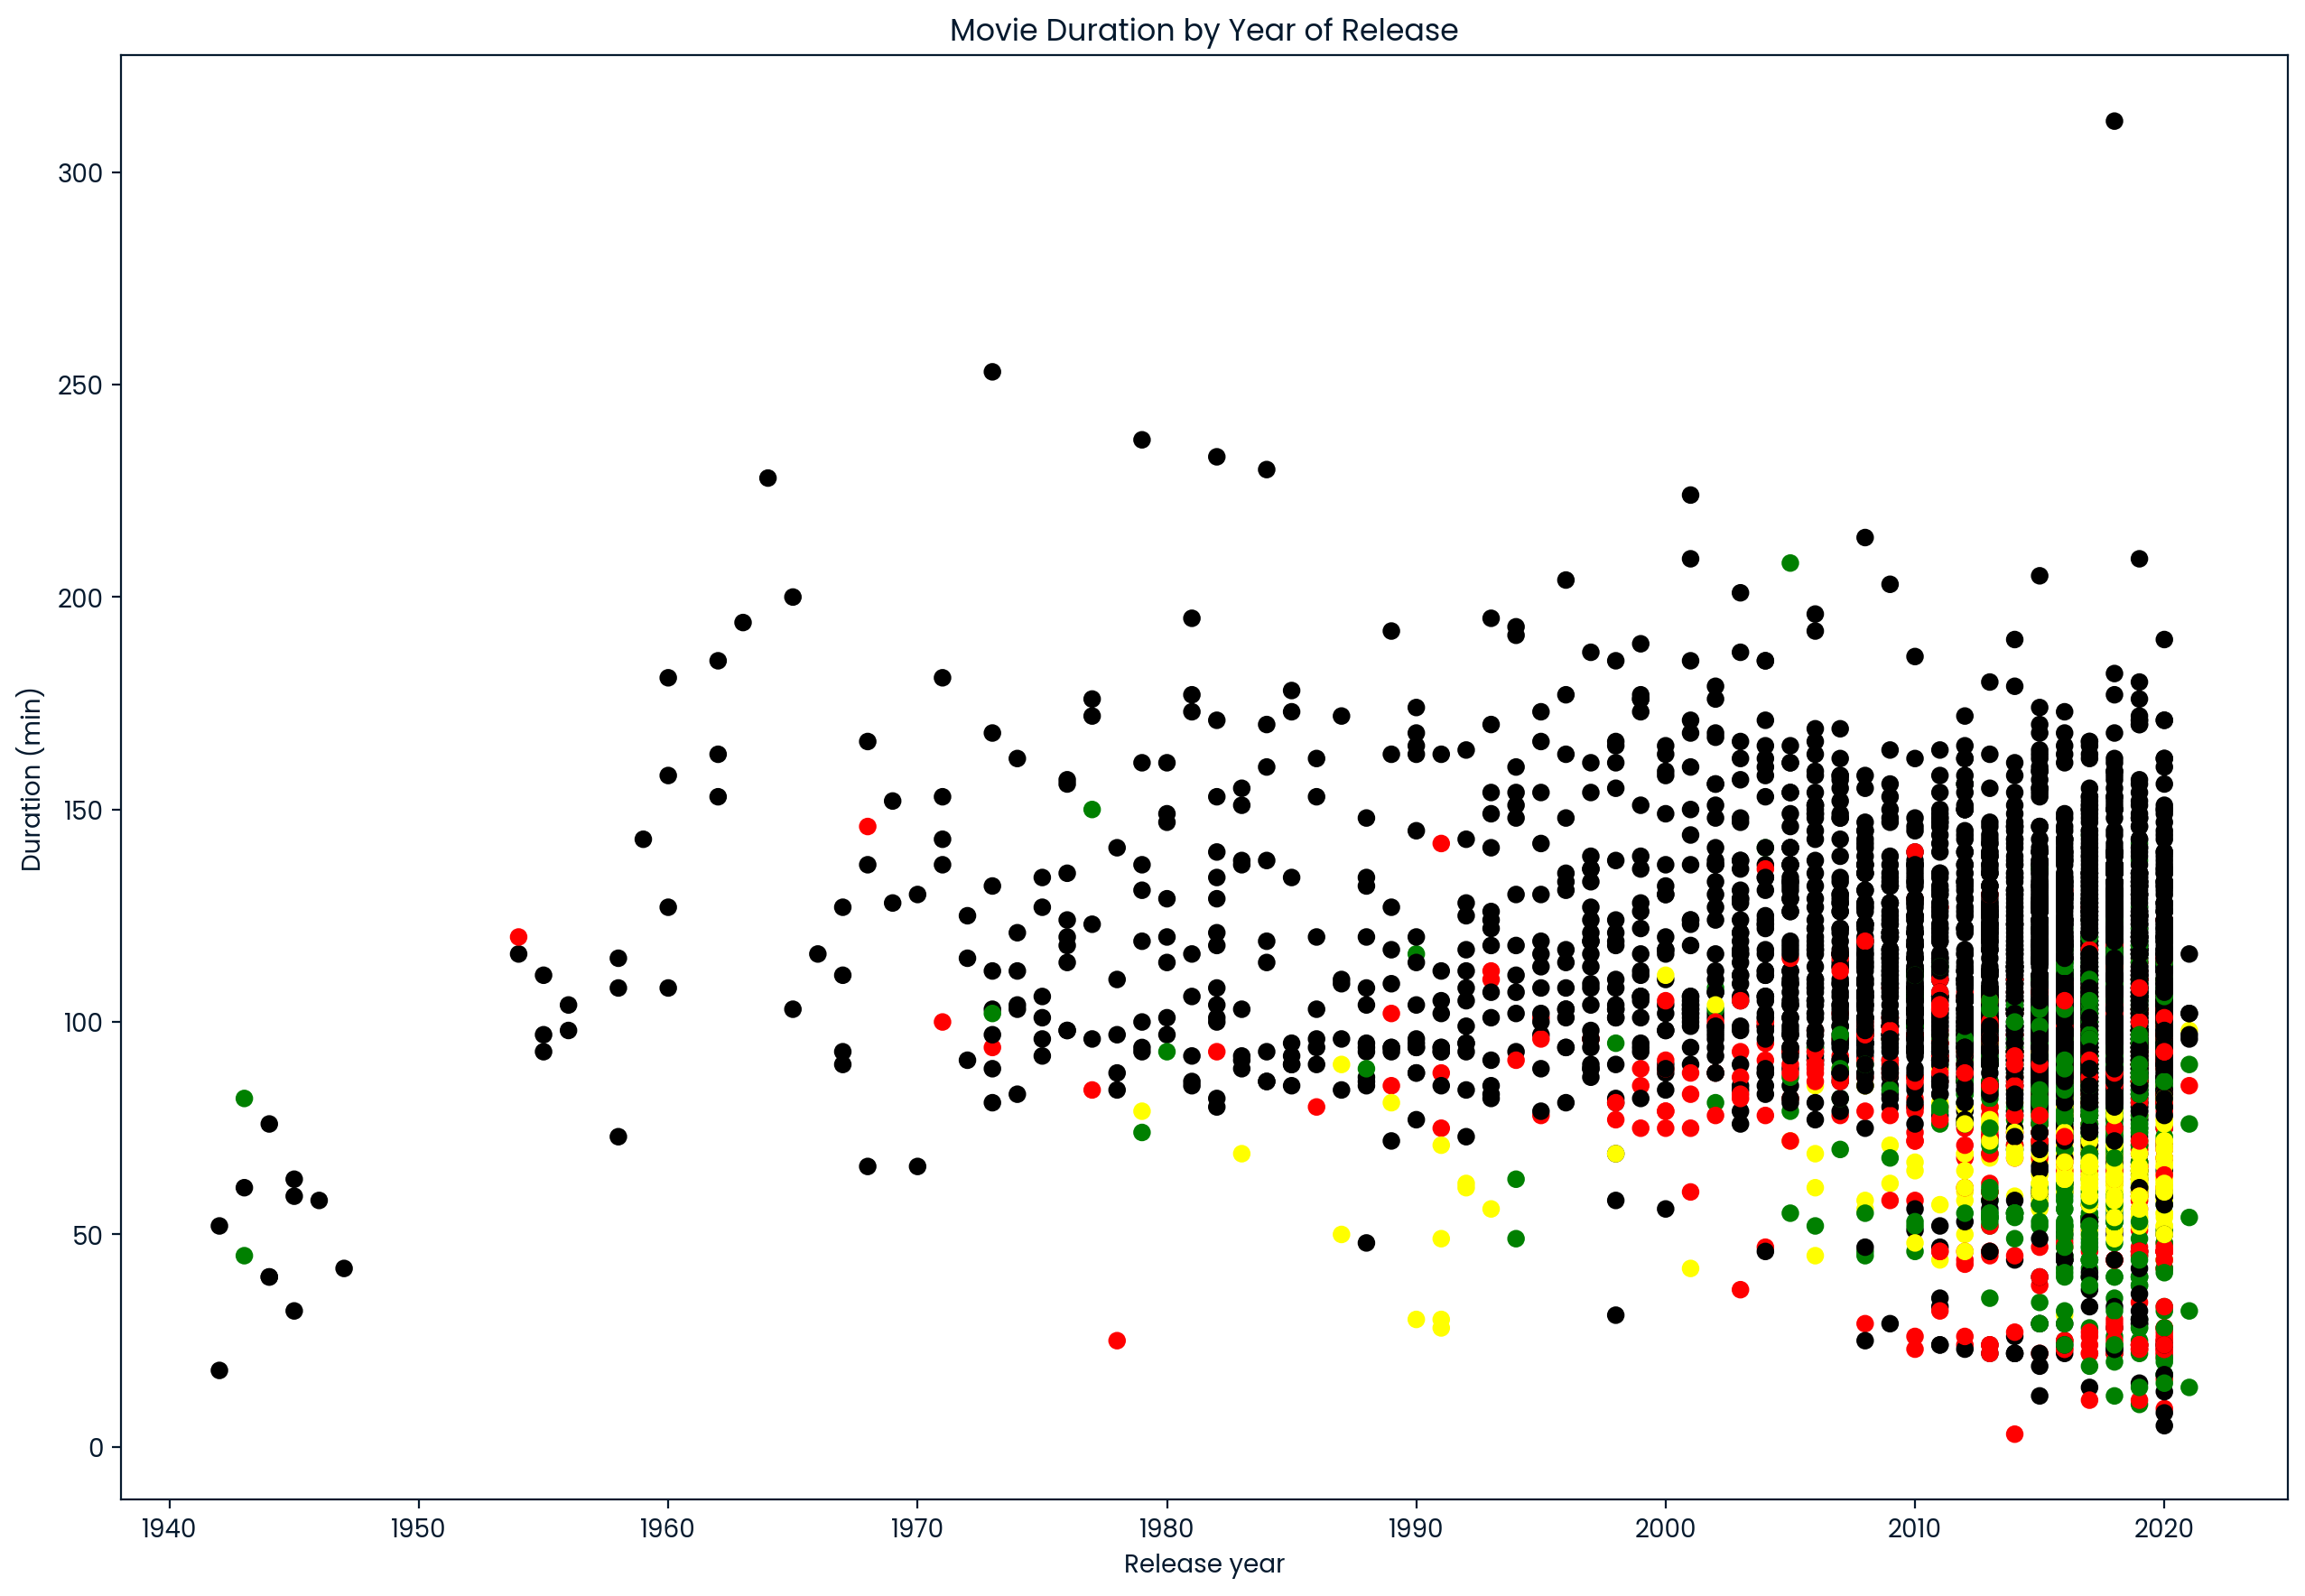

In [73]:
# Initialize a matplotlib figure object called fig and create a scatter plot with it
fig = plt.figure(figsize=(12, 8))
axes1 = fig.add_axes([0, 0, 1, 1])  
axes1.set_title("Movie Duration by Year of Release")
axes1.set_xlabel("Release year")
axes1.set_ylabel("Duration (min)")
axes1.scatter(netflix_movies["release_year"],netflix_movies["duration"],c=colors)

In [74]:
answer = "no"